<a href="https://colab.research.google.com/github/DrewHopkins/Hubble-Constant/blob/main/Hubbles_Constant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
import io
uploaded = files.upload()

Saving view.php.csv to view.php.csv


In [ ]:
df = pd.read_csv(io.StringIO(uploaded['view.php.csv'].decode('utf- 8')))

In [ ]:
print (df)

         z           d       d_err
0    0.010     51.5229     8.77905
1    0.010     43.6516     7.63887
2    0.010     55.4626     9.96117
3    0.013     63.6796     9.09091
4    0.013     55.7186     7.69781
..     ...         ...         ...
201  1.305   7979.9500  1102.47000
202  1.340   9638.2900  1375.96000
203  1.370  11117.3000  1279.93000
204  1.390   9549.9300   835.60200
205  1.755  11749.0000  1893.71000

[206 rows x 3 columns]


In [ ]:
col_list = ['z','d','d_err']
print (df['z'])

0      0.010
1      0.010
2      0.010
3      0.013
4      0.013
       ...  
201    1.305
202    1.340
203    1.370
204    1.390
205    1.755
Name: z, Length: 206, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression 
from sklearn.datasets import make_regression 
from sklearn import metrics
from scipy import stats

In [ ]:
c = 3*10**5
z = df['z']
d = df['d']
d_err = df['d_err']
rad_vel = z * c
z=np.array(z).reshape(-1, 1) 
d= np.array(d).reshape(-1, 1)
rad_vel= np.array(rad_vel).reshape(-1, 1)
X = d
Y = rad_vel

coefficient of determination for int=0: 0.9612702151679687
coefficient of determination: 0.9678049989190689
intercept: [13969.41078558]
slope: [[40.41944549]]
Mean Absolute Error: 15113.387658807262
Mean Squared Error: 486063896.29220706
Root Mean Squared Error: 22046.85683475554


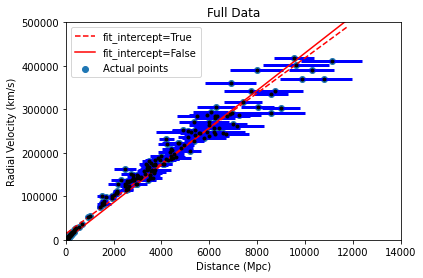

In [ ]:
lr_fi_true = LinearRegression(fit_intercept=True).fit(X, Y) 
lr_fi_false = LinearRegression(fit_intercept=False).fit(X, Y)
#Coeff
r_sq_f = lr_fi_false.score(d, rad_vel) 
r_sq_t = lr_fi_true.score(X, Y)
#line eqn populated
lr_fi_true_yhat = np.dot(X, lr_fi_true.coef_) + lr_fi_true.intercept_ 
lr_fi_false_yhat = np.dot(X, lr_fi_false.coef_) + lr_fi_false.intercept_
#make predictions
rad_vel_pred = lr_fi_false.predict(X)
#print stuff
print('coefficient of determination for int=0:', r_sq_f) 
print('coefficient of determination:', r_sq_t) 
print('intercept:', lr_fi_true.intercept_) 
print('slope:', lr_fi_true.coef_)
print('Mean Absolute Error:', metrics.mean_absolute_error(rad_vel, rad_vel_pred))
print('Mean Squared Error:', metrics.mean_squared_error(rad_vel, rad_vel_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(rad_vel, rad_vel_pred)))
#plot points
plt.scatter(df["d"], df["z"]*c , label='Actual points')
#plot fits
plt.plot(d, lr_fi_true_yhat, 'r--', label='fit_intercept=True') 
plt.plot(d, lr_fi_false_yhat, 'r-', label='fit_intercept=False')
plt.legend()
#graph limits
plt.xlim(0, 14000) 
plt.ylim(0, 500000)
plt.xlabel('Distance (Mpc)') 
plt.ylabel('Radial Velocity (km/s)') 
plt.title('Full Data')
#error bars
plt.errorbar(d, rad_vel, xerr=d_err, fmt='.k', color='black',ecolor='blue', elinewidth=3, capsize=0);
plt.show()



coefficient of determination for int=0: 0.9747319071210367
coefficient of determination: 0.9753390763720275
intercept: [272.13325179]
slope: [[60.05237979]]
Mean Absolute Error: 676.6094199905747
Mean Squared Error: 793850.2007876761
Root Mean Squared Error: 890.9827163237658


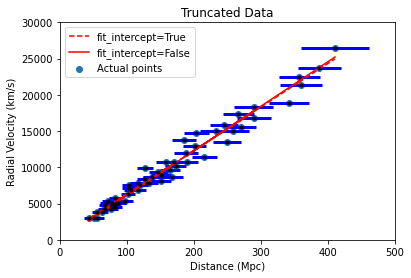

In [ ]:
z = z[z <= 0.1]
d = d[d <= 500]
d_err = d_err[d_err <= 53]
rad_vel = z * c
rad_vel = rad_vel[rad_vel <= 30000]

z=np.array(z).reshape(-1, 1) 
d= np.array(d).reshape(-1, 1)
rad_vel= np.array(rad_vel).reshape(-1, 1)

X = d
Y = rad_vel

lr_fi_true = LinearRegression(fit_intercept=True).fit(X, Y) 
lr_fi_false = LinearRegression(fit_intercept=False).fit(X, Y)
#Coeff
r_sq_f = lr_fi_false.score(d, rad_vel) 
r_sq_t = lr_fi_true.score(X, Y)
#line eqn populated
lr_fi_true_yhat = np.dot(X, lr_fi_true.coef_) + lr_fi_true.intercept_ 
lr_fi_false_yhat = np.dot(X, lr_fi_false.coef_) + lr_fi_false.intercept_
#make predictions
rad_vel_pred = lr_fi_false.predict(X)
#print stuff
print('coefficient of determination for int=0:', r_sq_f) 
print('coefficient of determination:', r_sq_t) 
print('intercept:', lr_fi_true.intercept_) 
print('slope:', lr_fi_true.coef_)
print('Mean Absolute Error:', metrics.mean_absolute_error(rad_vel, rad_vel_pred))
print('Mean Squared Error:', metrics.mean_squared_error(rad_vel, rad_vel_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(rad_vel, rad_vel_pred)))
#plot points
plt.scatter(X, Y, label='Actual points')
#plot fits
plt.plot(d, lr_fi_true_yhat, 'r--', label='fit_intercept=True') 
plt.plot(d, lr_fi_false_yhat, 'r-', label='fit_intercept=False')
plt.legend()
#graph limits
plt.xlim(0, 500) 
plt.ylim(0, 30000)
plt.xlabel('Distance (Mpc)') 
plt.ylabel('Radial Velocity (km/s)') 
plt.title('Truncated Data')
#error bars
plt.errorbar(d, rad_vel, xerr=d_err, fmt='.k', color='black',ecolor='blue', elinewidth=3, capsize=0);
plt.show()


In [ ]:
H = lr_fi_true.coef_
print (H)

[[60.05237979]]


In [ ]:
print ('The universe is ',1/H * 3.09 * 10 ** 19, 'seconds old')

The universe is  [[5.14550799e+17]] seconds old


In [ ]:
print ('The universe is ',1/H * 3.09 * 10 ** 19/(3.16 * 10 ** 7), 'years old')

The universe is  [[1.62832531e+10]] years old


In [ ]:
t = (2/3)*(1/H)
t = t * 3.09 * 10 ** 19/(3.16 * 10 ** 7)
print (' by the decelleration of gravity model we calculate the age of the unvierse to be', t, "years old")

 by the decelleration of gravity model we calculate the age of the unvierse to be [[1.08555021e+10]] years old


In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
import scipy.optimize as opt
c = 3*10**5
z = df['z']
d = df['d'] 
d_err = df['d_err'] 
rad_vel= z * c

In [ ]:
def chi_sqaured(func,xdata,ydata,yerr,*parameters): 
  return np.sum( ((func(xdata,*popt)-ydata)/yerr)**2)

In [ ]:
zmax = 1.7

In [ ]:
def linear_fit_function(x,H):
  y=c*x/H
  return y


In [ ]:
def quadratic_fit_function(x,H,q): 
  y = c * ( x + 0.5*(1 - q) * x*x)/H
  return y

Quadratic fit Hubble constant for z < 1.70 = 62.25 +- 0.77
Quadratic fit for the deceleration constant q = -0.01 +- 0.06
The percentage of matter-energy in the Universe that is in Dark Energy is 0.16


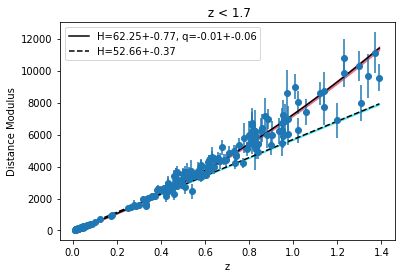

In [ ]:
popt, pcov = opt.curve_fit(quadratic_fit_function, z[z<=zmax], d[z<=zmax], sigma = d_err[z<=zmax],absolute_sigma = True)



perr = np.sqrt(np.diag(pcov))
yval = quadratic_fit_function(z[z<=zmax],*popt) 
dydq = c*z[z<=zmax]/(2*popt[0])
dydh = yval/popt[0]
yerr = np.sqrt( dydh**2 * pcov[0,0] + dydq**2 * pcov[1,1] + 2*dydq*dydh*pcov[0,1])



print('Quadratic fit Hubble constant for z < %.2f = %.2f +- %.2f' % (zmax, popt[0],perr[0]))
print('Quadratic fit for the deceleration constant q = %.2f +- %.2f' % (popt[1],perr[1]))
print('The percentage of matter-energy in the Universe that is in Dark Energy is %.2f' % (0.5*0.3 - popt[1 ]))


plt.plot(z[z<=zmax],quadratic_fit_function(z[z<=zmax],*popt),'-k',label='H=%.2f+-%.2f, q=%.2f+-%.2f'%(popt[0],perr[0],popt[1],perr[1])) 
plt.fill_between(z[z<=zmax],quadratic_fit_function(z[z<=zmax],*popt)- yerr,quadratic_fit_function(z[z<=zmax],*popt)+yerr, alpha=.5, edgecolor='crimson', facecolor='crimson')
popt,pcov = opt.curve_fit(linear_fit_function, z[z<=zmax], d[z<=zmax], sigma = d_err[z<=zmax],absolute_sigma = True)
perr = np.sqrt(np.diag(pcov))
yerr = np.abs( linear_fit_function(z[z<=zmax],*popt)/popt[0] * perr[0])

plt.scatter(z[z<=zmax], d[z<=zmax], color='black', s=1);
plt.errorbar(z[z<=zmax], d[z<=zmax], yerr=d_err[z<=zmax], fmt="o")

plt.plot(z[z<=zmax], linear_fit_function(z[z<=zmax],*popt),'--k',label='H=%.2f+-%.2f'%(popt[0],perr[0]))
plt.fill_between(z[z<=zmax],linear_fit_function(z[z<=zmax],popt[0])- yerr,linear_fit_function(z[z<=zmax],popt[0])+yerr,alpha=.5, edgecolor='cyan')
plt.xlabel('z')
plt.ylabel('Distance Modulus') 
plt.title(' z < %.1f' % zmax) 
plt.legend(loc='upper left') 
plt.draw()

the greater the redshift the greater the distance modulus
when the distance modulus is greater, thnn apperant is strictly greater than the abbsolute. 
That means when the star is 10 parsecs away then the star should appear brighter than if it were right where it is
The greater the redshift, the greater the distance that the star is away.
we take the slope of the quadratic fit which is 62.25 and 52.66 for the linear fit.


In [ ]:
#my hubble constant is off of the general hubble conatnat because it might not be using the correct limitation of redshift valhes. Since the universe is expanding and there are discrepecices from bent light in gas clouds